In [5]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)  # For reproducibility

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


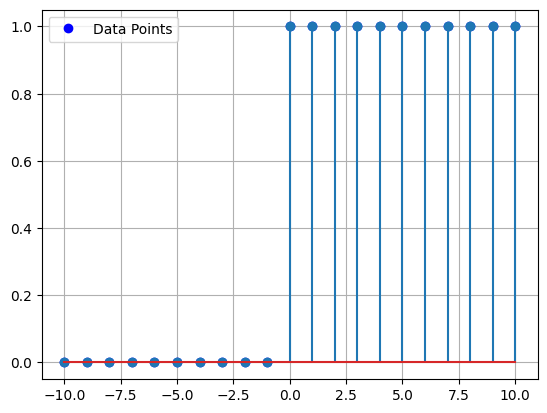

In [2]:
y=np.arange(-10, 11, 1)
x=np.where(y>=0,1,0)

print(y)

plt.plot(y, x, 'o', color='blue', label='Data Points')
plt.stem(y,x)
plt.grid()
plt.legend()
plt.show()

Text(0.5, 1.0, 'Sine Wave')

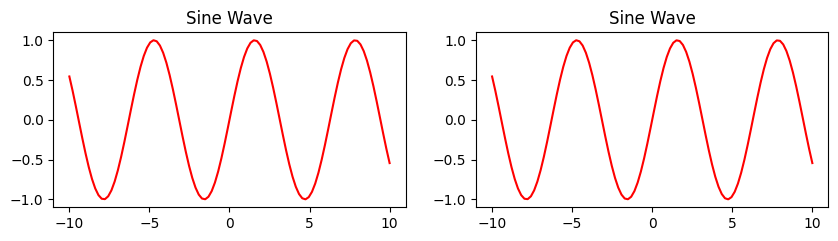

In [3]:
x=np.linspace(-10,10, 100)

y=np.sin(x)

plt.figure(figsize=(10, 5))

plt.subplot(2,2,1)
plt.plot(x, y, color='red', label='Sine Wave')
plt.title('Sine Wave')

plt.subplot(2,2,2)
plt.plot(x, y, color='red', label='Sine Wave')
plt.title('Sine Wave')

<StemContainer object of 3 artists>

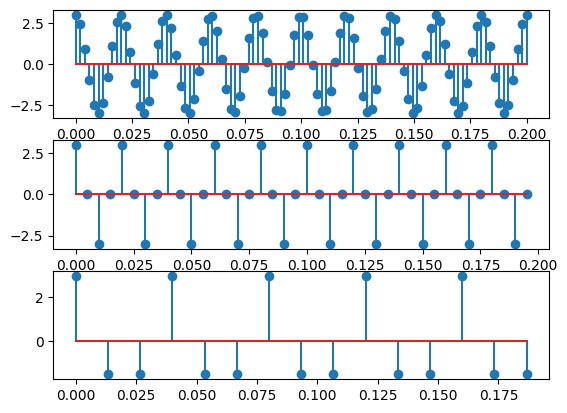

In [28]:

A=3
f=1
t_max=0.2
t=np.linspace(0, t_max, 100)
y=A*np.cos(100*np.pi*f*t )

f_high=200
f_low=75

t_high=np.arange(0,t_max ,1/f_high)
t_low=np.arange(0,t_max,1/f_low)

y_high=A*np.cos(100*np.pi*f*t_high )
y_low=A*np.cos(100*np.pi*f*t_low )

plt.subplot(3,1,1)
plt.stem(t,y)

plt.subplot(3,1,2)
plt.stem(t_high,y_high)

plt.subplot(3,1,3)
plt.stem(t_low,y_low)

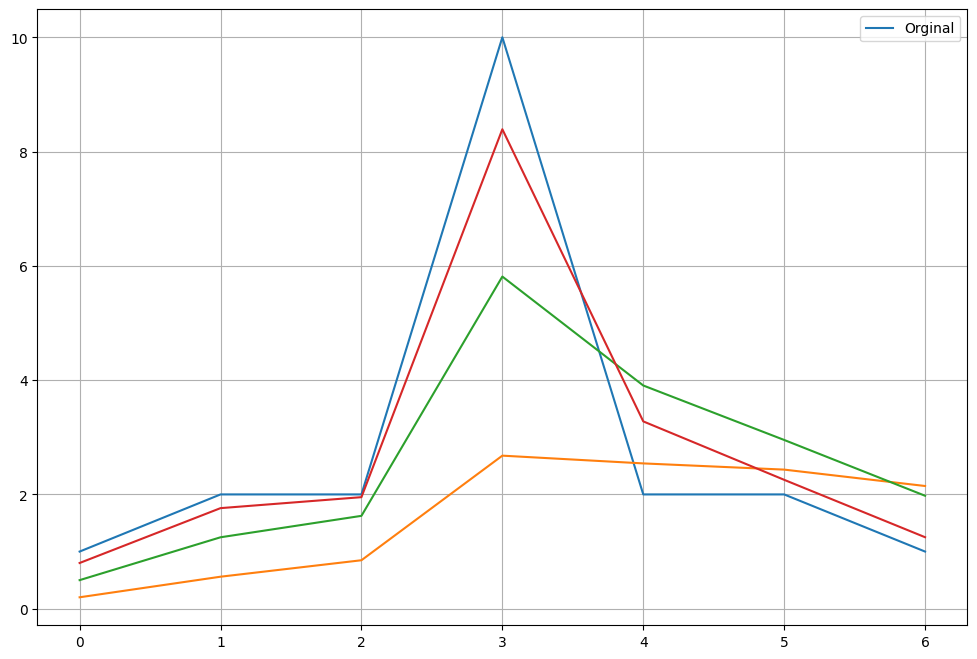

In [50]:
import numpy as np
import matplotlib.pyplot as plt

x=[1,2,2,10,2,2,1]

def compute(x,alpha):
    y = []
    y_previous=0

    for n in range(len(x)):
        y_current=(1-alpha)*y_previous+alpha*x[n]
        y.append(y_current)
        y_previous=y_current
    return y


y1 = compute(x, 0.2)   # More smoothing (slower to react to changes)
y2 = compute(x, 0.5)   # Moderate smoothing
y3 = compute(x, 0.8)   # Less smoothing (faster to react)
plt.figure(figsize=(12, 8))

plt.plot(x,label='Orginal')
plt.plot(y1)
plt.plot(y2)
plt.plot(y3)
plt.legend()
plt.grid()
plt.show()

<StemContainer object of 3 artists>

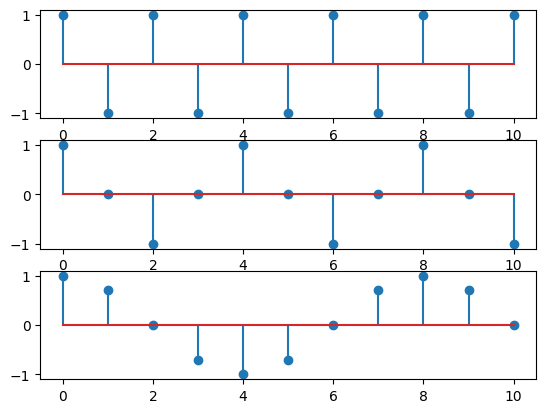

In [55]:
import numpy as np 
import matplotlib.pyplot as plt

n=np.arange(0,11,1)

w1=np.pi
w2=0.5*np.pi
w3=0.25*np.pi

y1=np.cos(w1*n)
y2=np.cos(w2*n)
y3=np.cos(w3*n)


plt.subplot(3,1,1)
plt.stem(n,y1)

plt.subplot(3,1,2)
plt.stem(n,y2)


plt.subplot(3,1,3)
plt.stem(n,y3)



## DFT

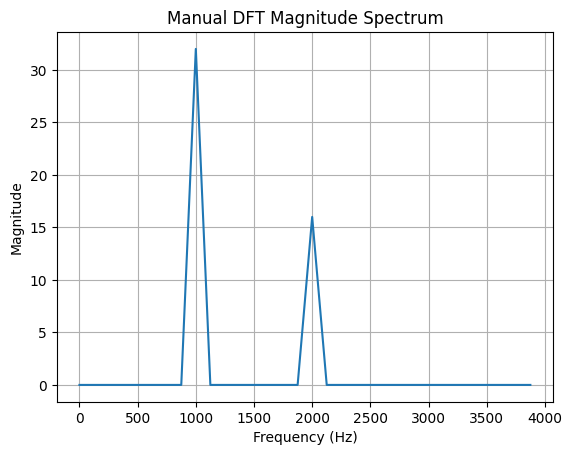

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def dft(x):
    N=len(x)
    X=[]
    for k in range(N):
        val=0
        for n in range (N):
            val+=x[n]*np.exp(-2j*np.pi*k*n/N)
        X.append(val)
    return np.array(X)

def hamming_window(N):
    return [0.54 - 0.46 * np.cos(2*np.pi*n/(N-1)) for n in range(N)]


fs = 8000   # Sampling frequency
N = 64      # Use smaller N for faster raw DFT
f1 = 1000
f2 = 2000

n=np.arange(N)
x = np.sin(2 * np.pi * f1 * n / fs) + 0.5 * np.sin(2 * np.pi * f2 * n / fs + 3 * np.pi / 4)

w=hamming_window(N)
x_window=w*x
freq=np.arange(N)*fs/N
X=dft(x)
Xw=dft(x_window)

N = len(X)
half_N = N // 2

# Prepare x and y data manually
freq_values = []
mag_values = []

for i in range(half_N):
    freq_values.append(freq[i])
    mag = (X[i].real**2 + X[i].imag**2)**0.5  # Manual magnitude = sqrt(Re² + Im²)
    mag_values.append(mag)

# Now manually plot
plt.plot(freq_values, mag_values)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Manual DFT Magnitude Spectrum")
plt.grid()
plt.show()
        